<a href="https://colab.research.google.com/github/NigelGoh16/Sentiment_Analytics/blob/master/Sentiment_Analysis_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Procurement

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp -r '/content/gdrive/MyDrive/ML/' kaggle.json
! cp -r /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/gdrive


In [ ]:
!cp -r '/content/gdrive/MyDrive/FYP/preprocessed_df2.csv' df.csv
!cp -r '/content/gdrive/MyDrive/ML/p_df_2.csv' df3.csv
!cp -r '/content/gdrive/MyDrive/ML/p_df_3.csv' df4.csv

In [ ]:
!cp -r '/content/gdrive/MyDrive/ML/Models' /content/Models

In [ ]:
! kaggle datasets download -d kazanova/sentiment140

 93% 75.0M/80.9M [00:00<00:00, 146MB/s]
100% 80.9M/80.9M [00:00<00:00, 145MB/s]


In [ ]:
# ! kaggle datasets download -d tariqsays/sentiment-dataset-with-1-million-tweets

 95% 72.0M/75.4M [00:02<00:00, 34.6MB/s]
100% 75.4M/75.4M [00:02<00:00, 27.9MB/s]


In [ ]:
# ! kaggle datasets download -d saurabhshahane/twitter-sentiment-dataset

 92% 7.00M/7.60M [00:00<00:00, 13.7MB/s]
100% 7.60M/7.60M [00:00<00:00, 10.4MB/s]


In [ ]:
! wget https://nlp.stanford.edu/data/glove.6B.zip

--2024-01-02 15:34:31--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-01-02 15:34:32--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-01-02 15:37:11 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
import zipfile

In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/sentiment-dataset-with-1-million-tweets.zip", "r")
zip_ref.extractall()
zip_ref = zipfile.ZipFile("/content/twitter-sentiment-dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/sentiment140.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/glove.6B.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
! pip install -q -U keras-tuner
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from numpy import array

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, LSTM, Activation, Dropout, Dense, Conv1D
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Dataset
# movie_reviews = pd.read_csv("a1_IMDB_Dataset.csv")

columns = ["sentiment","1","2","3","4","review"]
movie_reviews = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", names=columns)
mv = pd.read_csv("/content/df.csv")
mv2 = pd.read_csv("/content/df3.csv")
mv3 = pd.read_csv("/content/df4.csv")

In [ ]:
# mv1 = pd.read_csv("/content/Twitter_Data.csv", encoding = "ISO-8859-1")
# mv2 = pd.read_csv("/content/dataset.csv", encoding = "ISO-8859-1")

In [ ]:
#Dataset exploration

movie_reviews.shape

(1600000, 6)

In [ ]:
#Dataset exploration

movie_reviews.head(5)

,sentiment,1,2,3,4,review
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Missing value check

movie_reviews.isnull().values.any()

False

In [ ]:
mv1.dropna(inplace=True)
mv2.dropna(inplace=True)
print(mv1.isnull().values.any())
print(mv2.isnull().values.any())

False
False


In [ ]:
mv1.head(), mv2.head()

(                                          clean_text  category
 0  when modi promised âminimum government maxim...      -1.0
 1  talk all the nonsense and continue all the dra...       0.0
 2  what did just say vote for modi  welcome bjp t...       1.0
 3  asking his supporters prefix chowkidar their n...       1.0
 4  answer who among these the most powerful world...       1.0,
                                                 Text Language      Label
 0  @Charlie_Corley @Kristine1G @amyklobuchar @Sty...       en  litigious
 1  #BadBunny: Como dos gotas de agua: Joven se di...       es   negative
 2  https://t.co/YJNiO0p1JV Flagstar Bank disclose...       en  litigious
 3  Rwanda is set to host the headquarters of Unit...       en   positive
 4  OOPS. I typed her name incorrectly (todayâs ...       en  litigious)

In [ ]:
mv3 = mv1[(mv1['category'] == -1) | (mv1['category'] == 1)]
mv4 = mv2[(mv2['Language'] == 'en') & (mv2['Label'] == 'negative') | (mv2['Label'] == 'positive')]
mv4 = mv4[['Text', 'Label']]
mv3['category'] = mv3['category'].replace(-1, 0)
mv4['Label'] = mv4['Label'].replace('negative', 0)
mv4['Label'] = mv4['Label'].replace('positive', 1)
mv3.head(), mv4.head()

<ipython-input-35-3dedd9051fc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv3['category'] = mv3['category'].replace(-1, 0)


(                                          clean_text  category
 0  when modi promised âminimum government maxim...       0.0
 2  what did just say vote for modi  welcome bjp t...       1.0
 3  asking his supporters prefix chowkidar their n...       1.0
 4  answer who among these the most powerful world...       1.0
 8  with upcoming election india saga going import...       1.0,
                                                  Text  Label
 3   Rwanda is set to host the headquarters of Unit...      1
 5   It sucks for me since I'm focused on the natur...      0
 8   Social Security. Constant political crises dis...      0
 9   @FilmThePoliceLA A broken rib can puncture a l...      0
 10  @jacobringenwald @aKeithWatts @CountDankulaTV ...      0)

In [ ]:
movie_reviews['sentiment'] = movie_reviews['sentiment'].replace(4, 1)

In [ ]:
import plotly.express as px

vc = movie_reviews['sentiment'].value_counts()
print(vc)
for i in vc:
  print(i)

0    800000
1    800000
Name: sentiment, dtype: int64
800000
800000


In [ ]:
fig_bar = px.bar (movie_reviews, x=movie_reviews['sentiment'].unique().tolist(), y=vc.tolist())
fig_bar

<Axes: xlabel='sentiment', ylabel='count'>

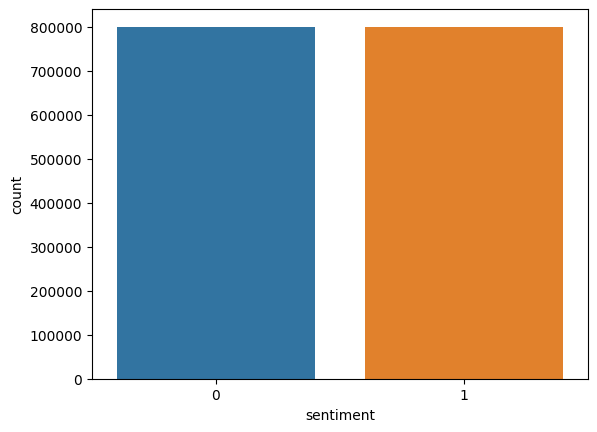

In [ ]:
#Positive/Negative distribution plot

import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews)

In [ ]:
mv2['clean_text'] = mv2['clean_text'].astype(str)
mv3['Text'] = mv3['Text'].astype(str)

Average length of sentence: 16.124835279051208 
Sentence length that encompasses 95%: 28


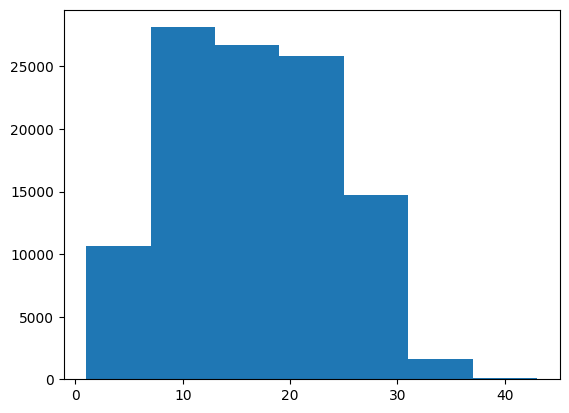

In [ ]:
# How long is each sentence on average?
total_sentences = mv2['clean_text'].to_list()
sent_lens = [len(sentence.split()) for sentence in total_sentences]
avg_sent_len = np.mean(sent_lens)
output_seq_len = int(np.percentile(sent_lens, 95))
print(f"Average length of sentence: {avg_sent_len} \nSentence length that encompasses 95%: {output_seq_len}" )
max_len = output_seq_len

# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

Average length of sentence: 15.122883513372717 
Sentence length that encompasses 95%: 30


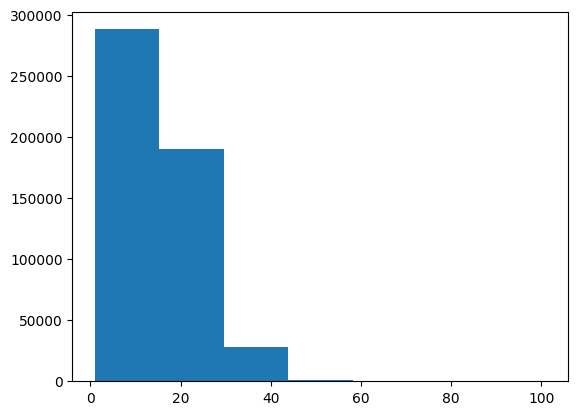

In [ ]:
# How long is each sentence on average?
total_sentences = mv3['Text'].to_list()
sent_lens = [len(sentence.split()) for sentence in total_sentences]
avg_sent_len = np.mean(sent_lens)
output_seq_len = int(np.percentile(sent_lens, 95))
print(f"Average length of sentence: {avg_sent_len} \nSentence length that encompasses 95%: {output_seq_len}" )
max_len = output_seq_len

# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

Average length of sentence: 13.176150625 
Sentence length that encompasses 95%: 25


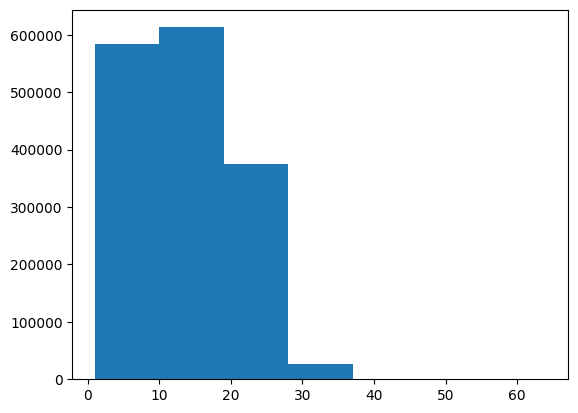

In [ ]:
# How long is each sentence on average?
total_sentences = movie_reviews['review'].to_list()
sent_lens = [len(sentence.split()) for sentence in total_sentences]
avg_sent_len = np.mean(sent_lens)
output_seq_len = int(np.percentile(sent_lens, 95))
print(f"Average length of sentence: {avg_sent_len} \nSentence length that encompasses 95%: {output_seq_len}" )
max_len = output_seq_len

# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

# Callbacks

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['acc']
  val_accuracy = history.history['val_acc']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares two model history objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  print(len(acc))

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history with new history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  print(len(total_acc))
  print(total_acc)

  # Make plots
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results



In [ ]:
import os

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

# Data Preprocessing

In [ ]:
#Review example

movie_reviews["review"][2]

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
TAG_RE = re.compile(r'<[^>]+>')

wnl = WordNetLemmatizer()

def remove_tags(text):
    return TAG_RE.sub('', text)

stopwords_list = stopwords.words('english')

def preprocess_text(sen):
    # Instantiate list for tokenized words
    l = ""
    sen = sen.lower()
    # Remove html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    # Lemmatize sentence
    for word, tag in pos_tag(word_tokenize(sentence)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
                lemma = word
                l += lemma + " "
        else:
                lemma = wnl.lemmatize(word, wntag)
                l += lemma + " "
    return l

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
def preprocess_text_spacy(text):
  text = re.sub(r'\s+', ' ', text)
  doc = nlp(text.lower())  # Load the text into a spaCy document
  # tokens = [t.text for t in doc if not t.is_punct and not t.is_stop]  # Extract and filter tokens
  lemmas = [t.lemma_ for t in doc if not t.is_punct and not t.is_stop]  # Lemmatize each token
  return lemmas  # Join lemmas with space

In [ ]:
preprocess_text_spacy(movie_reviews['review'][2])

['@kenichan', 'dive', 'time', 'ball', 'manage', 'save', '50', 'rest', 'bound']

In [ ]:
mv = movie_reviews.copy()
for i in range(len(mv['review'])):
  mv['review'][i] = preprocess_text_spacy(mv['review'][i])
  print(i)

In [ ]:
mv = movie_reviews[['sentiment', 'review']]
mv['review'] = mv['review'].apply(preprocess_text)

<ipython-input-26-b24906baeb4a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
mv3['clean_text'] = mv3['clean_text'].apply(preprocess_text)
mv4['Text'] = mv4['Text'].apply(preprocess_text)

<ipython-input-38-d23036b884c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv3['clean_text'] = mv3['clean_text'].apply(preprocess_text)


In [ ]:
mv3.to_csv('preprocessed_df2.csv', encoding='utf-8')
mv4.to_csv('preprocessed_df3.csv', encoding='utf-8')

In [ ]:
!cp -r '/content/preprocessed_df2.csv' '/content/gdrive/MyDrive/ML/p_df_2.csv'
!cp -r '/content/preprocessed_df3.csv' '/content/gdrive/MyDrive/ML/p_df_3.csv'

In [ ]:
mv

,Unnamed: 0,sentiment,review
0,0,0,switchfoot http twitpic com zl awww bummer sho...
1,1,0,upset update facebook texting might cry result...
2,2,0,kenichan dive many time ball manage save rest ...
3,3,0,whole body feel itchy like fire
4,4,0,nationwideclass behaving mad see
...,...,...,...
1599995,1599995,1,woke school best feeling ever
1599996,1599996,1,thewdb com cool hear old walt interview http b...
1599997,1599997,1,ready mojo makeover ask detail
1599998,1599998,1,happy th birthday boo alll time tupac amaru sh...


In [ ]:
mv.isnull().values.any()

True

In [ ]:
mv = mv.dropna()

In [ ]:
# X = [x for x in mv['review']]

In [ ]:
X = [x.split() for x in mv['review']]

In [ ]:
# mv.to_csv('preprocessed_df.csv', encoding='utf-8')

In [ ]:
# X = list(mv['review'])

In [ ]:
X[:2]

['switchfoot http twitpic com zl awww bummer shoulda get david carr third day ',
 'upset update facebook texting might cry result school today also blah ']

In [ ]:
x = mv['review'][1]
x

'upset update facebook texting might cry result school today also blah '

In [ ]:
X2 = [x.split() for x in mv2['clean_text']]
X3 = [x.split() for x in mv3['Text']]
y2 = mv2['category']
y2 = np.array(list(y2))
y3 = mv3['Label']
y3 = np.array(list(y3))

In [ ]:
# Converting sentiment labels to 0 & 1

y = mv['sentiment']

# y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
y = np.array(list(y))
# y = list(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# y1 = tf.expand_dims(y, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=42)

In [ ]:
# Our vectorized labels
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
y_train2 = np.asarray(y_train2).astype('float32').reshape((-1,1))
y_test2 = np.asarray(y_test2).astype('float32').reshape((-1,1))
y_train3 = np.asarray(y_train3).astype('float32').reshape((-1,1))
y_test3 = np.asarray(y_test3).astype('float32').reshape((-1,1))

# Tokenizing & Embeddings

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

573593

In [ ]:
# X_train = word_tokenizer.texts_to_sequences(X_train)
# X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = pad_sequences(X_train, padding='post', truncating='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', truncating='post', maxlen=max_len)

In [ ]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_length, 50))

In [ ]:
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
len(embedding_matrix)

573593

In [ ]:
# # Visualize the shapes of values in the dictionary
# for key, value in embeddings_dictionary.items():
#     if isinstance(value, np.ndarray):
#         print(f'Key: {key}, Shape: {value.shape}')
#     else:
#         print(f'Key: {key}, Not a NumPy array')

In [ ]:
embedding_layer = Embedding(len(embedding_matrix), 50, weights=[embedding_matrix], input_length=25, trainable=False)

test1 = movie_reviews["review"][2]
test2 = X[2]
test3 = word_tokenizer.texts_to_sequences([test2])
test4 = pad_sequences(test3, padding='post', truncating='post', maxlen=max_len)
test5 = embedding_layer(test4)
print(f"Original test: {test1}\n{len(test1)} \
      \n\nPreprocessed text: {test2}\n{len(test2)} \
      \n\nTokenized Vectors: {test3}\n{len(test3)} \
      \n\nEqual length (95%) Vectors: {test4}\n{test4.shape} \
      \n\nEmbedded Vectors: {test5}\n{test5.shape}")

Original test: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
89       

Preprocessed text: ['kenichan', 'dive', 'many', 'time', 'ball', 'manage', 'save', 'rest', 'go', 'bound']
10       

Tokenized Vectors: [[23928, 3560, 221, 11, 771, 983, 506, 335, 2, 2828]]
1       

Equal length (95%) Vectors: [[23928  3560   221    11   771   983   506   335     2  2828     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]
(1, 25)       

Embedded Vectors: [[[ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.23603  -0.18022   0.42956  ... -0.24763   1.2351   -0.24891 ]
  [ 0.6979    0.08234   0.041526 ...  0.037265 -0.60443  -0.64699 ]
  ...
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]]]
(1, 25, 50)


In [ ]:
import pickle

# saving
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(word_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!cp -r '/content/tokenizer.pkl' '/content/gdrive/MyDrive/ML'

In [ ]:
# X2 = word_tokenizer.texts_to_sequences(X)
# X2 = pad_sequences(X2, padding='post', truncating='post', maxlen=max_len)
# # X2 = embedding_layer(X2)

# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.20, random_state=42)

# Datasets

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(512).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(512).prefetch(tf.data.AUTOTUNE)

# train_dataset = train_dataset.batch(10).prefetch(tf.data.AUTOTUNE)
# valid_dataset = valid_dataset.batch(10).prefetch(tf.data.AUTOTUNE)

# 32 64 128 256 512

# Mixed Precision

In [ ]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy("mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

# Model 1 (SVM)

## Training

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_1 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_1.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Evaluating & Visualizing

In [ ]:
score_1 = model_1.score(X_test, y_test)
print(f"Our baseline model achieves an accuracy of: {score_1*100:.2f}%")

Our baseline model achieves an accuracy of: 75.63%


# Model 2 (DNN)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'linear'])
  hp_layer_1 = hp.Int("units", min_value=32, max_value=512, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.Dense(units=hp_layer_1, activation=hp_activation)(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_2_DNN")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_2_DNN')

Reloading Tuner from dir/model_2_DNN/tuner0.json


In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

Trial 26 Complete [00h 07m 24s]
val_acc: 0.5219607949256897

Best val_acc So Far: 0.5307832956314087
Total elapsed time: 01h 39m 12s


In [ ]:
tuner.results_summary(num_trials=10)

Results summary
Results in dir/model_2_DNN
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0023 summary
Hyperparameters:
activation: relu
units: 480
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5307832956314087

Trial 0012 summary
Hyperparameters:
activation: relu
units: 32
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0007
Score: 0.52843177318573

Trial 0013 summary
Hyperparameters:
activation: relu
units: 160
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.5282968878746033

Trial 0007 summary
Hyperparameters:
activation: relu
units: 32
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.5277373790740967

Trial 0008 summary
Hyperparameters:
activation: relu
units: 160
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_e

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_2 = tuner.hypermodel.build(best_hps)

In [ ]:
model_2.summary()

Model: "model_2_DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 dense_4 (Dense)             (None, 25, 480)           24480     
                                                                 
 dense_5 (Dense)             (None, 25, 1)             481       
                                                                 
Total params: 28704611 (109.50 MB)
Trainable params: 24961 (97.50 KB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25), dtype="int32")
x = embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_DNN")

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_2.summary()

Model: "model_2_DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 dense_6 (Dense)             (None, 25, 128)           6528      
                                                                 
 dense_7 (Dense)             (None, 25, 1)             129       
                                                                 
Total params: 28686307 (109.43 MB)
Trainable params: 6657 (26.00 KB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


In [ ]:
# Fit model
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=20,
                              validation_data=valid_dataset,
                              validation_steps=int(0.15 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="DNN_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="DNN_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/DNN_50D_1L/20231217-094735
Epoch 1/20
5998/5998 [==============================] - 29s 5ms/step - loss: 0.6878 - acc: 0.5229 - val_loss: 0.6863 - val_acc: 0.5231 - lr: 1.0000e-04
Epoch 2/20
5998/5998 [==============================] - 28s 5ms/step - loss: 0.6858 - acc: 0.5231 - val_loss: 0.6853 - val_acc: 0.5248 - lr: 1.0000e-04
Epoch 3/20
5998/5998 [==============================] - 35s 6ms/step - loss: 0.6851 - acc: 0.5257 - val_loss: 0.6851 - val_acc: 0.5258 - lr: 1.0000e-04
Epoch 4/20
5998/5998 [==============================] - 36s 6ms/step - loss: 0.6847 - acc: 0.5259 - val_loss: 0.6845 - val_acc: 0.5264 - lr: 1.0000e-04
Epoch 5/20
5998/5998 [==============================] - 53s 9ms/step - loss: 0.6845 - acc: 0.5279 - val_loss: 0.6844 - val_acc: 0.5266 - lr: 1.0000e-04
Epoch 6/20
5998/5998 [==============================] - 39s 7ms/step - loss: 0.6843 - acc: 0.5280 - val_loss: 0.6842 - val_acc: 0.5269 - lr: 1.0000e-04
Epoch 7/20
40

5998/5998 [==============================] - 24s 4ms/step - loss: 0.6842 - acc: 0.5276 - val_loss: 0.6841 - val_acc: 0.5266 - lr: 1.0000e-04


## Evaluating & Visualizing

In [ ]:
score_2 = model_2.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 31s 3ms/step - loss: 0.6839 - acc: 0.5293


# Model 3 (LSTM)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.LSTM(units=hp_layer_1)(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_3_LSTM")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_4_LSTM')

In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

Trial 30 Complete [00h 08m 25s]
val_acc: 0.7319114208221436

Best val_acc So Far: 0.7757973074913025
Total elapsed time: 02h 05m 08s


In [ ]:
tuner.results_summary(num_trials=10)

Results summary
Results in dir/model_4_LSTM
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0017 summary
Hyperparameters:
units: 256
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.7757973074913025

Trial 0016 summary
Hyperparameters:
units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.7752971053123474

Trial 0024 summary
Hyperparameters:
units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.7743687033653259

Trial 0025 summary
Hyperparameters:
units: 128
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.7729495167732239

Trial 0012 summary
Hyperparameters:
units: 224
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 

In [ ]:
tuner.results_summary(num_trials=10)

Results summary
Results in dir/model_3_LSTM
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0005 summary
Hyperparameters:
units: 128
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0004
Score: 0.7635340094566345

Trial 0009 summary
Hyperparameters:
units: 96
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7624180316925049

Trial 0006 summary
Hyperparameters:
units: 64
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0003
Score: 0.7606924772262573

Trial 0004 summary
Hyperparameters:
units: 128
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7455095052719116

Trial 0003 summary
Hyperparameters:
units: 64
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7421771883964539

Trial 0008 summary
H

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_3 = tuner.hypermodel.build(best_hps)

In [ ]:
model_3.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28771427 (109.75 MB)
Trainable params: 91777 (358.50 KB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
x = layers.LSTM(64, return_sequences=True, dropout=0.2)(x)
x = layers.LSTM(64, kernel_regularizer='l1', return_sequences=True, dropout=0.2)(x)
# x = layers.LSTM(128)(x)
outputs = layers.Dense(1, activation="sigmoid", dtype=tf.float32)(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_LSTM")

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_3.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_7 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 lstm_13 (LSTM)              (None, 25, 64)            29440     
                                                                 
 lstm_14 (LSTM)              (None, 25, 64)            33024     
                                                                 
 dense_5 (Dense)             (None, 25, 1)             65        
                                                                 
Total params: 28742179 (109.64 MB)
Trainable params: 62529 (244.25 KB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


In [ ]:
# for layer in model_3.layers:
#   print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
# Fit model
model_3_history = model_3.fit(train_dataset,
                              # steps_per_epoch=int(0.20 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=20,
                              validation_data=valid_dataset,
                              # validation_steps=int(0.20 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="LSTM_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="LSTM_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/LSTM_50D_1L/20240102-111326
Epoch 1/20
127959/127959 [==============================] - 1169s 9ms/step - loss: 0.5882 - acc: 0.7060 - val_loss: 0.5455 - val_acc: 0.7353 - lr: 0.0010
Epoch 2/20
127959/127959 [==============================] - 1205s 9ms/step - loss: 0.5616 - acc: 0.7232 - val_loss: 0.5432 - val_acc: 0.7391 - lr: 0.0010
Epoch 3/20
127959/127959 [==============================] - 1310s 10ms/step - loss: 0.5562 - acc: 0.7274 - val_loss: 0.5383 - val_acc: 0.7419 - lr: 0.0010
Epoch 4/20
127959/127959 [==============================] - 1344s 11ms/step - loss: 0.5543 - acc: 0.7288 - val_loss: 0.5384 - val_acc: 0.7433 - lr: 0.0010
Epoch 5/20
 17926/127959 [===>..........................] - ETA: 17:25 - loss: 0.5526 - acc: 0.7299

KeyboardInterrupt: ignored

## Evaluating & Visualizing

In [ ]:
score_3 = model_3.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 53s 5ms/step - loss: 0.4694 - acc: 0.7789


# Model 4 (GRU)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.LSTM(units=hp_layer_1)(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_4_GRU")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_4_GRU')

In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

Trial 28 Complete [00h 06m 48s]
val_acc: 0.7444685697555542

Best val_acc So Far: 0.7751314640045166
Total elapsed time: 01h 48m 10s


In [ ]:
tuner.results_summary(num_trials=10)

Results summary
Results in dir/model_4_GRU
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0016 summary
Hyperparameters:
units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.7751314640045166

Trial 0017 summary
Hyperparameters:
units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.7743530869483948

Trial 0024 summary
Hyperparameters:
units: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.7669788599014282

Trial 0015 summary
Hyperparameters:
units: 224
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0009
Score: 0.7620928883552551

Trial 0012 summary
Hyperparameters:
units: 192
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
t

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_4 = tuner.hypermodel.build(best_hps)

In [ ]:
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 lstm_1 (LSTM)               (None, 224)               246400    
                                                                 
 dense_1 (Dense)             (None, 1)                 225       
                                                                 
Total params: 28926275 (110.34 MB)
Trainable params: 246625 (963.38 KB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
x = layers.GRU(128, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = layers.GRU(64, kernel_regularizer='l1', return_sequences=True)(x)
x = Dropout(0.5)(x)
x = layers.GRU(128)(x)
x = Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_GRU")

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 gru_3 (GRU)                 (None, 25, 128)           69120     
                                                                 
 dropout_3 (Dropout)         (None, 25, 128)           0         
                                                                 
 gru_4 (GRU)                 (None, 25, 64)            37248     
                                                                 
 dropout_4 (Dropout)         (None, 25, 64)            0         
                                                                 
 gru_5 (GRU)                 (None, 128)               

In [ ]:
# Fit model
model_4_history = model_4.fit(train_dataset,
                              # steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              steps_per_epoch=len(train_dataset),
                              epochs=20,
                              validation_data=valid_dataset,
                              # validation_steps=int(0.15 * len(valid_dataset)),
                              validation_steps=len(valid_dataset),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="GRU_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="GRU_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/GRU_50D_1L/20231231-145722
Epoch 1/20
4999/4999 [==============================] - 73s 13ms/step - loss: 0.7186 - acc: 0.7355 - val_loss: 0.5267 - val_acc: 0.7567 - lr: 0.0010
Epoch 2/20
4999/4999 [==============================] - 74s 15ms/step - loss: 0.5221 - acc: 0.7616 - val_loss: 0.5108 - val_acc: 0.7677 - lr: 0.0010
Epoch 3/20
4999/4999 [==============================] - 67s 13ms/step - loss: 0.5086 - acc: 0.7703 - val_loss: 0.5048 - val_acc: 0.7713 - lr: 0.0010
Epoch 4/20
4999/4999 [==============================] - 73s 15ms/step - loss: 0.5001 - acc: 0.7755 - val_loss: 0.5025 - val_acc: 0.7732 - lr: 0.0010
Epoch 5/20
4999/4999 [==============================] - 65s 13ms/step - loss: 0.4937 - acc: 0.7796 - val_loss: 0.5018 - val_acc: 0.7745 - lr: 0.0010
Epoch 6/20
4999/4999 [==============================] - 57s 11ms/step - loss: 0.4886 - acc: 0.7830 - val_loss: 0.5025 - val_acc: 0.7743 - lr: 0.0010
Epoch 7/20
4999/4999 [=========

## Evaluating & Visualizing

In [ ]:
score_4 = model_4.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 45s 4ms/step - loss: 0.4738 - acc: 0.7740


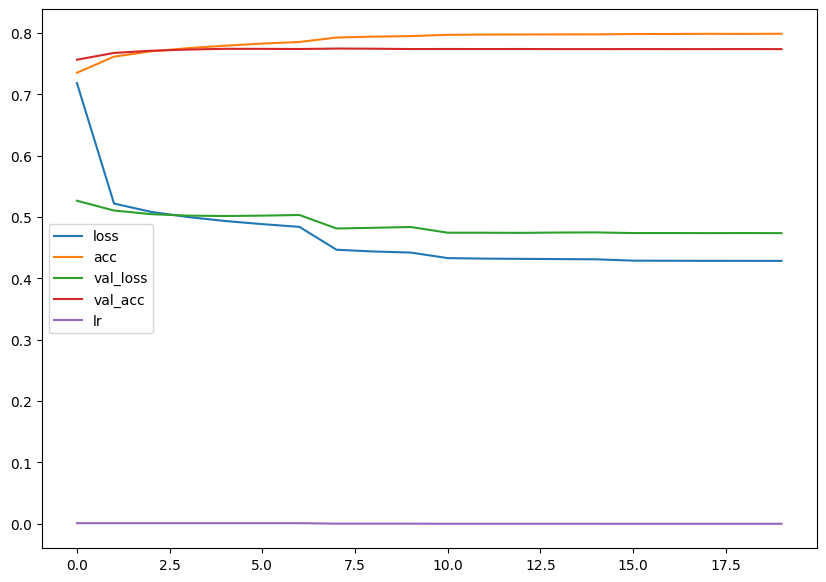

In [ ]:
# Plot the training curves
pd.DataFrame(model_4_history.history).plot(figsize=(10, 7));

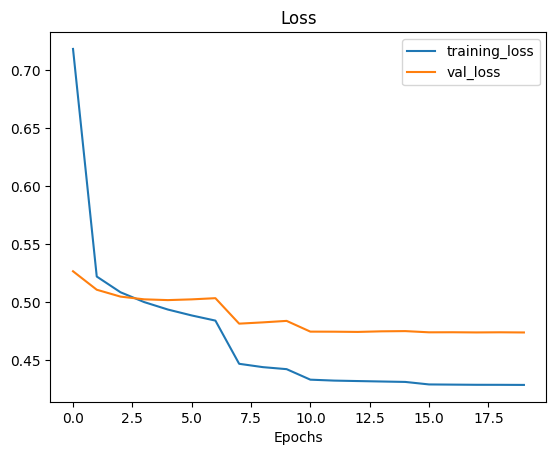

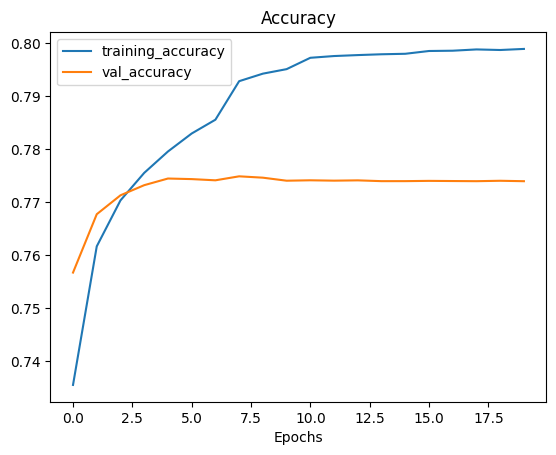

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(model_4_history)

In [ ]:
# Make predictions
preds = model_4.predict(X_test)
preds = tf.squeeze(tf.round(preds))
preds[:20]

9997/9997 [==============================] - 37s 4ms/step


<tf.Tensor: shape=(20,), dtype=float16, numpy=
array([0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0.], dtype=float16)>

In [ ]:
# Get baseline results
results = calculate_results(y_true=y_test,
                            y_pred=preds)
results

{'accuracy': 77.39529475020163,
 'precision': 0.7740128191923561,
 'recall': 0.7739529475020163,
 'f1': 0.7739330729873807}

# Model 5 (BiLSTM)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.Bidirectional(layers.LSTM(units=hp_layer_1))(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_5_BiLSTM")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_3_LSTM')

Reloading Tuner from dir/model_3_LSTM/tuner0.json


In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

In [ ]:
tuner.results_summary(num_trials=10)

Results summary
Results in dir/model_3_LSTM
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0005 summary
Hyperparameters:
units: 128
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0004
Score: 0.7635340094566345

Trial 0009 summary
Hyperparameters:
units: 96
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7624180316925049

Trial 0006 summary
Hyperparameters:
units: 64
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0003
Score: 0.7606924772262573

Trial 0004 summary
Hyperparameters:
units: 128
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7455095052719116

Trial 0003 summary
Hyperparameters:
units: 64
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7421771883964539

Trial 0008 summary
H

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_5 = tuner.hypermodel.build(best_hps)

In [ ]:
model_5.summary()

Model: "model_5_BiLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 bidirectional (Bidirection  (None, 256)               183296    
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 28863203 (110.10 MB)
Trainable params: 183553 (717.00 KB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


## Training

In [ ]:
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
x = layers.LSTM(64, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = layers.Bidirectional(layers.LSTM(128, kernel_regularizer='l1', return_sequences=True))(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = Dropout(0.5)(x)
# x = layers.LSTM(64)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_BiLSTM")

model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_5.summary()

Model: "model_5_BiLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 25)]              0         
                                                                 
 embedding_10 (Embedding)    (None, 25, 50)            28679650  
                                                                 
 lstm_38 (LSTM)              (None, 25, 64)            29440     
                                                                 
 dropout_21 (Dropout)        (None, 25, 64)            0         
                                                                 
 bidirectional_15 (Bidirect  (None, 25, 256)           197632    
 ional)                                                          
                                                                 
 lstm_40 (LSTM)              (None, 25, 64)            82176     
                                                    

In [ ]:
# Fit model
model_5_history = model_5.fit(train_dataset,
                              # steps_per_epoch=int(0.10 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=15,
                              validation_data=valid_dataset,
                              # validation_steps=int(0.20 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="BiLSTM_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="BiLSTM_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/BiLSTM_50D_1L/20240101-085721
Epoch 1/15
39988/39988 [==============================] - 600s 15ms/step - loss: 0.6286 - acc: 0.7423 - val_loss: 0.5638 - val_acc: 0.7646 - lr: 0.0010
Epoch 2/15
39988/39988 [==============================] - 598s 15ms/step - loss: 0.5642 - acc: 0.7657 - val_loss: 0.5558 - val_acc: 0.7701 - lr: 0.0010
Epoch 3/15
39988/39988 [==============================] - 563s 14ms/step - loss: 0.5543 - acc: 0.7719 - val_loss: 0.5533 - val_acc: 0.7726 - lr: 0.0010
Epoch 4/15
39985/39988 [============================>.] - ETA: 0s - loss: 0.5486 - acc: 0.7757

KeyboardInterrupt: ignored

## Evaluating & Visualizing

In [ ]:
score_5 = model_5.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 64s 6ms/step - loss: 0.4683 - acc: 0.7764


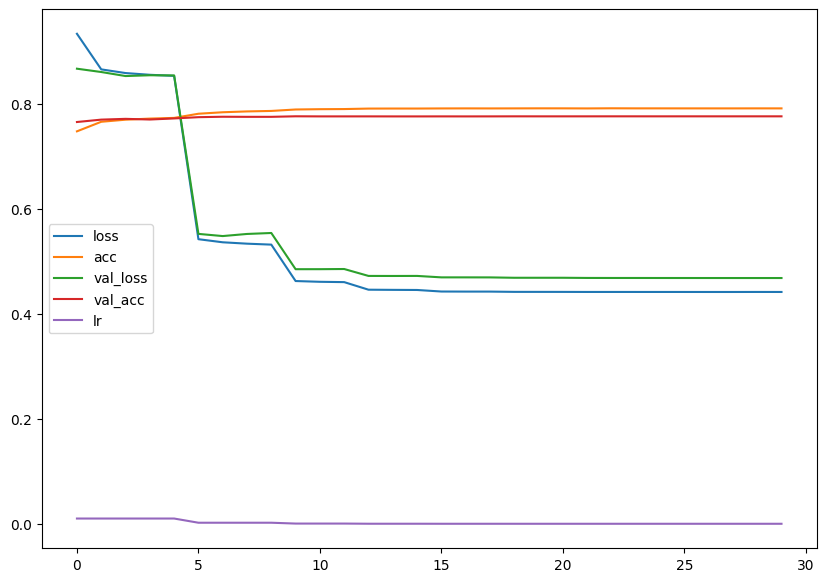

In [ ]:
# Plot the training curves
pd.DataFrame(model_5_history.history).plot(figsize=(10, 7));

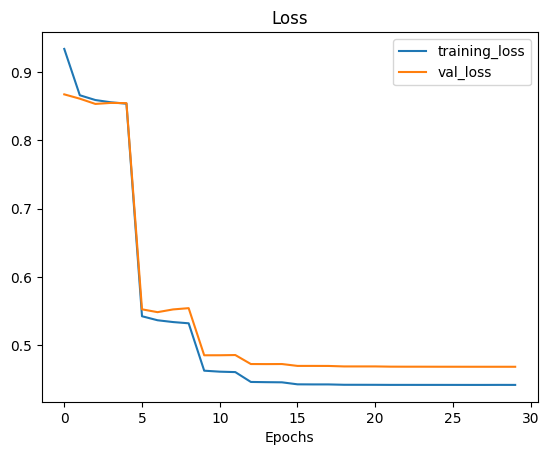

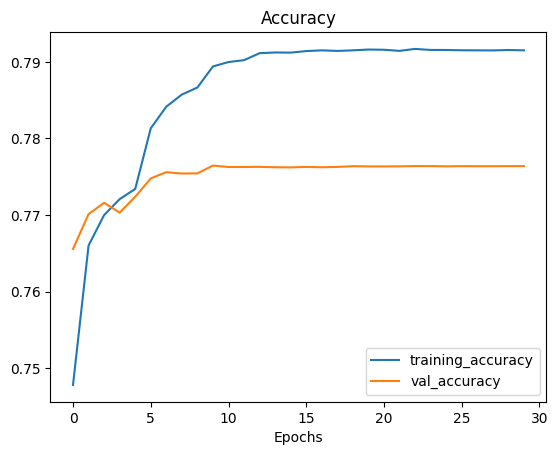

In [ ]:
# Check out the loss curves of model_5
plot_loss_curves(model_5_history)

In [ ]:
# Make predictions
preds = model_5.predict(X_test)
preds = tf.squeeze(tf.round(preds))
preds[:20]

9997/9997 [==============================] - 59s 6ms/step


<tf.Tensor: shape=(20,), dtype=float16, numpy=
array([0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0.], dtype=float16)>

In [ ]:
# Get baseline results
results = calculate_results(y_true=y_test,
                            y_pred=preds)
results

{'accuracy': 77.63880987064627,
 'precision': 0.7764469275782911,
 'recall': 0.7763880987064626,
 'f1': 0.7763689000978212}

# Model 6 (LSTM-GRU)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_layer_2 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.LSTM(units=hp_layer_1, return_sequences=True)(x)
  x = layers.LSTM(units=hp_layer_2)(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_6_LSTM-GRU")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_6_LSTM-GRU')

In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

Trial 30 Complete [00h 10m 31s]
val_acc: 0.7718929052352905

Best val_acc So Far: 0.7778135538101196
Total elapsed time: 02h 38m 13s


In [ ]:
tuner.results_summary(num_trials=10)

Results summary
Results in dir/model_6_LSTM-GRU
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0016 summary
Hyperparameters:
units: 256
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.7778135538101196

Trial 0017 summary
Hyperparameters:
units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.7753283977508545

Trial 0024 summary
Hyperparameters:
units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.7752752304077148

Trial 0025 summary
Hyperparameters:
units: 96
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.77264004945755

Trial 0029 summary
Hyperparameters:
units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_6 = tuner.hypermodel.build(best_hps)

In [ ]:
model_6.summary()

Model: "model_6_LSTM-GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 lstm_2 (LSTM)               (None, 25, 256)           314368    
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 29519587 (112.61 MB)
Trainable params: 839937 (3.20 MB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
x = layers.LSTM(128, return_sequences=True)(x)
x = layers.GRU(128)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_6 = tf.keras.Model(inputs, outputs, name="model_6_LSTM-GRU")

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_6.summary()

Model: "model_6_LSTM-GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 25)]              0         
                                                                 
 embedding_11 (Embedding)    (None, 25, 50)            28679650  
                                                                 
 lstm_3 (LSTM)               (None, 25, 128)           91648     
                                                                 
 gru_2 (GRU)                 (None, 128)               99072     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28870499 (110.13 MB)
Trainable params: 190849 (745.50 KB)
Non-trainable params: 28679650 (109.40 MB)
_________________________________________________________________


In [ ]:
# Fit model
model_6_history = model_6.fit(train_dataset,
                              steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=20,
                              validation_data=valid_dataset,
                              validation_steps=int(0.15 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="LSTM-GRU_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="LSTM-GRU_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/LSTM-GRU_50D_1L/20231217-045707
Epoch 1/20
5998/5998 [==============================] - 77s 12ms/step - loss: 0.5636 - acc: 0.7060 - val_loss: 0.5376 - val_acc: 0.7264 - lr: 0.0010
Epoch 2/20
5998/5998 [==============================] - 72s 12ms/step - loss: 0.5191 - acc: 0.7399 - val_loss: 0.5094 - val_acc: 0.7486 - lr: 0.0010
Epoch 3/20
5998/5998 [==============================] - 57s 10ms/step - loss: 0.5014 - acc: 0.7523 - val_loss: 0.4919 - val_acc: 0.7573 - lr: 0.0010
Epoch 4/20
5998/5998 [==============================] - 68s 11ms/step - loss: 0.4913 - acc: 0.7579 - val_loss: 0.4850 - val_acc: 0.7631 - lr: 0.0010
Epoch 5/20
5998/5998 [==============================] - 59s 10ms/step - loss: 0.4843 - acc: 0.7648 - val_loss: 0.4788 - val_acc: 0.7681 - lr: 0.0010
Epoch 6/20
5998/5998 [==============================] - 71s 12ms/step - loss: 0.4794 - acc: 0.7668 - val_loss: 0.4758 - val_acc: 0.7703 - lr: 0.0010
Epoch 7/20
3996/5998 [====

5998/5998 [==============================] - 42s 7ms/step - loss: 0.4765 - acc: 0.7686 - val_loss: 0.4742 - val_acc: 0.7726 - lr: 0.0010


## Evaluating & Visualizing

In [ ]:
score_6 = model_6.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 47s 5ms/step - loss: 0.4732 - acc: 0.7709


# Model 7 (LSTM-CNN)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_layer_2 = hp.Int("filters", min_value=8, max_value=64, step=8)
  hp_layer_3 = hp.Int("kernel_size", min_value=2, max_value=5, step=1)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.LSTM(units=hp_layer_1, return_sequences=True)(x)
  x = layers.Conv1D(filters=hp_layer_2, kernel_size=hp_layer_3, activation="relu")(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_7_LSTM-CNN")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_7_LSTM-CNN')

In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

Trial 18 Complete [00h 08m 24s]
val_acc: 0.7585970759391785

Best val_acc So Far: 0.7612302303314209
Total elapsed time: 01h 08m 54s

Search: Running Trial #19

Value             |Best Value So Far |Hyperparameter
224               |64                |units
8                 |32                |filters
2                 |5                 |kernel_size
0.01              |0.001             |learning_rate
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
5998/5998 [==============================] - 87s 14ms/step - loss: 0.6431 - acc: 0.5961 - val_loss: 0.5815 - val_acc: 0.7006
Epoch 2/4
5998/5998 [==============================] - 82s 14ms/step - loss: 0.5619 - acc: 0.7071 - val_loss: 0.5472 - val_acc: 0.7184
Epoch 3/4
5998/5998 [==============================] - 88s 15ms/step - loss: 0.5492 - acc: 0.7177 - val_loss: 0.

In [ ]:
tuner.results_summary(num_trials=10)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_7 = tuner.hypermodel.build(best_hps)

In [ ]:
model_7.summary()

## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
x = layers.LSTM(128, dropout=0.2, return_sequences=True)(x)
x = layers.LSTM(128, kernel_regularizer='l1', dropout=0.2, return_sequences=True)(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_7 = tf.keras.Model(inputs, outputs, name="model_7_LSTM-CNN")

model_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_7.summary()

Model: "model_7_LSTM-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 lstm_2 (LSTM)               (None, 25, 128)           91648     
                                                                 
 lstm_3 (LSTM)               (None, 25, 128)           131584    
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 32)            20512     
                                                                 
 dense (Dense)               (None, 21, 1)             33        
                                                                 
Total params: 28923427 (110.33 MB)
Trainable param

In [ ]:
# Fit model
model_7_history = model_7.fit(train_dataset,
                              steps_per_epoch=len(train_dataset),
                              epochs=20,
                              validation_data=valid_dataset,
                              validation_steps=len(valid_dataset),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="LSTM-CNN_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="LSTM-CNN_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/LSTM-CNN_50D_1L/20240102-080233
Epoch 1/20
2500/2500 [==============================] - 37s 12ms/step - loss: 1.0726 - acc: 0.6989 - val_loss: 0.5982 - val_acc: 0.7360 - lr: 0.0010
Epoch 2/20
2500/2500 [==============================] - 29s 11ms/step - loss: 0.6102 - acc: 0.7269 - val_loss: 0.5837 - val_acc: 0.7471 - lr: 0.0010
Epoch 3/20
2500/2500 [==============================] - 29s 11ms/step - loss: 0.5964 - acc: 0.7367 - val_loss: 0.5742 - val_acc: 0.7531 - lr: 0.0010
Epoch 4/20
2500/2500 [==============================] - 29s 11ms/step - loss: 0.5880 - acc: 0.7429 - val_loss: 0.5673 - val_acc: 0.7581 - lr: 0.0010
Epoch 5/20
2500/2500 [==============================] - 29s 12ms/step - loss: 0.5819 - acc: 0.7471 - val_loss: 0.5640 - val_acc: 0.7600 - lr: 0.0010
Epoch 6/20
2500/2500 [==============================] - 28s 11ms/step - loss: 0.5775 - acc: 0.7500 - val_loss: 0.5602 - val_acc: 0.7631 - lr: 0.0010
Epoch 7/20
2500/2500 [====

## Evaluating & Visualizing

In [ ]:
score_7 = model_7.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 41s 4ms/step - loss: 0.4881 - acc: 0.7715


# Model 8 (BiLSTM-CNN)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_layer_2 = hp.Int("filters", min_value=8, max_value=64, step=8)
  hp_layer_3 = hp.Int("kernel_size", min_value=2, max_value=5, step=1)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.Bidirectional(layers.LSTM(units=hp_layer_1, return_sequences=True))(x)
  x = layers.Conv1D(filters=hp_layer_2, kernel_size=hp_layer_3, activation="relu")(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_8_BiLSTM-CNN")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_8_BiLSTM-CNN')

In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

In [ ]:
tuner.results_summary(num_trials=10)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_8 = tuner.hypermodel.build(best_hps)

In [ ]:
model_8.summary()

## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
x = layers.LSTM(128, dropout=0.2, return_sequences=True)(x)
x = layers.Bidirectional(layers.LSTM(64, dropout=0.2, return_sequences=True))(x)
x = layers.LSTM(128, kernel_regularizer='l1', dropout=0.2, return_sequences=True)(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_8 = tf.keras.Model(inputs, outputs, name="model_8_BiLSTM-CNN")

model_8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_8.summary()

Model: "model_8_BiLSTM-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 lstm_4 (LSTM)               (None, 25, 128)           91648     
                                                                 
 bidirectional (Bidirection  (None, 25, 128)           98816     
 al)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 25, 128)           131584    
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 32)            20512     
                                                

In [ ]:
# Fit model
model_8_history = model_8.fit(train_dataset,
                              # steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=20,
                              validation_data=valid_dataset,
                              # validation_steps=int(0.15 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="BiLSTM-CNN_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="BiLSTM-CNN_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/BiLSTM-CNN_50D_1L/20240102-081342
Epoch 1/20
2500/2500 [==============================] - 62s 22ms/step - loss: 1.0645 - acc: 0.7076 - val_loss: 0.5901 - val_acc: 0.7431 - lr: 0.0010
Epoch 2/20
2500/2500 [==============================] - 50s 20ms/step - loss: 0.6011 - acc: 0.7356 - val_loss: 0.5706 - val_acc: 0.7563 - lr: 0.0010
Epoch 3/20
2500/2500 [==============================] - 49s 20ms/step - loss: 0.5863 - acc: 0.7456 - val_loss: 0.5609 - val_acc: 0.7632 - lr: 0.0010
Epoch 4/20
2500/2500 [==============================] - 52s 21ms/step - loss: 0.5764 - acc: 0.7525 - val_loss: 0.5547 - val_acc: 0.7678 - lr: 0.0010
Epoch 5/20
2500/2500 [==============================] - 51s 20ms/step - loss: 0.5689 - acc: 0.7573 - val_loss: 0.5524 - val_acc: 0.7690 - lr: 0.0010
Epoch 6/20
2500/2500 [==============================] - 49s 20ms/step - loss: 0.5635 - acc: 0.7606 - val_loss: 0.5485 - val_acc: 0.7714 - lr: 0.0010
Epoch 7/20
2500/2500 [==

## Evaluating & Visualizing

In [ ]:
score_8 = model_8.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 57s 6ms/step - loss: 0.4585 - acc: 0.7832


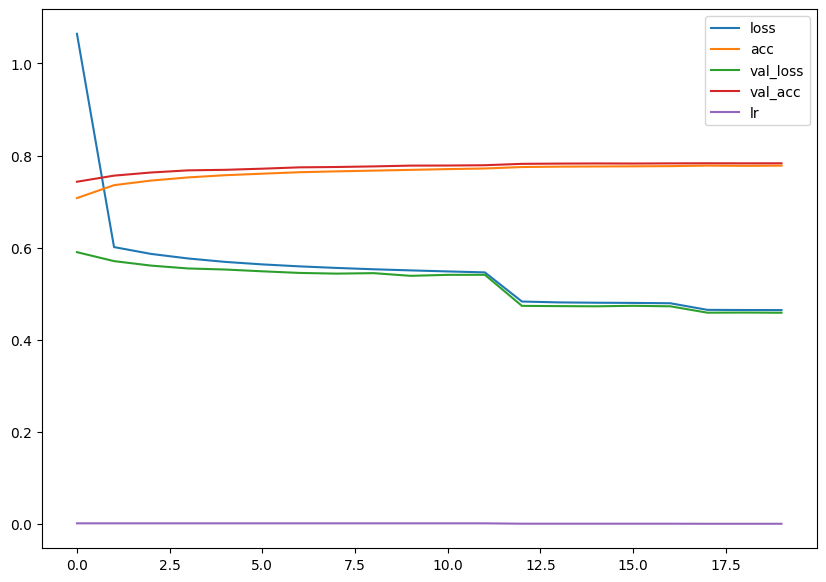

In [ ]:
# Plot the training curves
pd.DataFrame(model_8_history.history).plot(figsize=(10, 7));

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(model_8_history)

In [ ]:
# Make predictions
preds = model_8.predict(X_test)
preds = tf.squeeze(tf.round(tf.reduce_mean(preds, axis=1)))

# Get baseline results
results = calculate_results(y_true=y_test,
                            y_pred=preds)
results

9997/9997 [==============================] - 50s 5ms/step


{'accuracy': 78.31183689801125,
 'precision': 0.7831191865893218,
 'recall': 0.7831183689801124,
 'f1': 0.783118614663479}

# Model 9 (BiGru-CNN)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_layer_2 = hp.Int("filters", min_value=8, max_value=64, step=8)
  hp_layer_3 = hp.Int("kernel_size", min_value=2, max_value=5, step=1)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.Bidirectional(layers.GRU(units=hp_layer_1, return_sequences=True))(x)
  x = layers.Conv1D(filters=hp_layer_2, kernel_size=hp_layer_3, activation="relu")(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_9_BiGRU-CNN")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_3_LSTM')mm

In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

In [ ]:
tuner.results_summary(num_trials=10)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_9 = tuner.hypermodel.build(best_hps)

In [ ]:
model_9.summary()

## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_9 = tf.keras.Model(inputs, outputs, name="model_9_BiGRU-CNN")

model_9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_9.summary()

In [ ]:
# Fit model
model_9_history = model_9.fit(train_dataset,
                              steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=20,
                              validation_data=valid_dataset,
                              validation_steps=int(0.15 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="BiGRU-CNN_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="BiGRU-CNN_50D_1L")])

## Evaluating & Visualizing

In [ ]:
score_9 = model_9.evaluate(X_test, y_test, verbose=1)

# Model 10 (LSTM-GRU-CNN)

## Hyperparameter Tuning

In [ ]:
def model_builder(hp):
  tf.random.set_seed(42)
  embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

  hp_layer_1 = hp.Int("units", min_value=32, max_value=256, step=32)
  hp_layer_2 = hp.Int("filters", min_value=8, max_value=64, step=8)
  hp_layer_3 = hp.Int("kernel_size", min_value=2, max_value=5, step=1)
  hp_layer_4 = hp.Int("units", min_value=32, max_value=256, step=32)

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  inputs = layers.Input(shape=(25), dtype="int32")
  x = embedding_layer(inputs)
  x = layers.LSTM(units=hp_layer_1, return_sequences=True)(x)
  x = layers.GRU(units=hp_layer_4, return_sequences=True)(x)
  x = layers.Conv1D(filters=hp_layer_2, kernel_size=hp_layer_3, activation="relu")(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = tf.keras.Model(inputs, outputs, name="model_10_LSTM-GRU-CNN")

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_acc',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='model_3_LSTM')

In [ ]:
tuner.search(train_dataset,
             steps_per_epoch=int(0.15 * len(train_dataset)),
             epochs=20,
             validation_data = valid_dataset,
             validation_split=int(0.15 * len(valid_dataset)),
             callbacks=[early_stopping])

In [ ]:
tuner.results_summary(num_trials=10)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_10 = tuner.hypermodel.build(best_hps)

In [ ]:
model_10.summary()

## Training

In [ ]:
# Neural Network architecture
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(42)
embedding_layer = Embedding(vocab_length, 50, weights=[embedding_matrix], input_length=25 , trainable=False)

inputs = layers.Input(shape=(25,), dtype="int32")
x = embedding_layer(inputs)
# x = layers.LSTM(128)(x)
# x = layers.GRU(128)(x)

x = layers.LSTM(128, dropout=0.2, return_sequences=True)(x)
x = layers.Bidirectional(layers.LSTM(64, dropout=0.2, return_sequences=True))(x)
# x = layers.LSTM(128, kernel_regularizer='l1', dropout=0.2, return_sequences=True)(x)
x = layers.GRU(128, kernel_regularizer='l1', dropout=0.2, return_sequences=True)(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling1D(pool_size=2)(x)
# x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_10 = tf.keras.Model(inputs, outputs, name="model_10_LSTM-GRU-CNN")

model_10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_10.summary()

Model: "model_10_LSTM-GRU-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_6 (Embedding)     (None, 25, 50)            28679650  
                                                                 
 lstm_11 (LSTM)              (None, 25, 128)           91648     
                                                                 
 bidirectional_3 (Bidirecti  (None, 25, 128)           98816     
 onal)                                                           
                                                                 
 gru_2 (GRU)                 (None, 25, 128)           99072     
                                                                 
 conv1d_7 (Conv1D)           (None, 21, 32)            20512     
                                             

In [ ]:
# Fit model
model_10_history = model_10.fit(train_dataset,
                              # steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=20,
                              validation_data=valid_dataset,
                              # validation_steps=int(0.15 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="LSTM-GRU-CNN_50D_1L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="LSTM-GRU-CNN_50D_1L")])

Saving TensorBoard log files to: tensorflow_hub/LSTM-GRU-CNN_50D_1L/20240102-095307
Epoch 1/20
39988/39988 [==============================] - 567s 14ms/step - loss: 0.6187 - acc: 0.7290 - val_loss: 0.5513 - val_acc: 0.7587 - lr: 0.0010
Epoch 2/20
39988/39988 [==============================] - 525s 13ms/step - loss: 0.5573 - acc: 0.7545 - val_loss: 0.5390 - val_acc: 0.7689 - lr: 0.0010
Epoch 3/20
39988/39988 [==============================] - 517s 13ms/step - loss: 0.5481 - acc: 0.7611 - val_loss: 0.5303 - val_acc: 0.7744 - lr: 0.0010
Epoch 4/20
39988/39988 [==============================] - 521s 13ms/step - loss: 0.5430 - acc: 0.7645 - val_loss: 0.5272 - val_acc: 0.7759 - lr: 0.0010
Epoch 5/20
39988/39988 [==============================] - 542s 14ms/step - loss: 0.5395 - acc: 0.7668 - val_loss: 0.5248 - val_acc: 0.7777 - lr: 0.0010
Epoch 6/20
39988/39988 [==============================] - 571s 14ms/step - loss: 0.5369 - acc: 0.7684 - val_loss: 0.5221 - val_acc: 0.7796 - lr: 0.0010
Epoc

KeyboardInterrupt: ignored

In [ ]:
# Fit model
model_10_history = model_10.fit(train_dataset,
                              # steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=20,
                              validation_data=valid_dataset,
                              # validation_steps=int(0.15 * len(valid_dataset)),
                              callbacks=[early_stopping,
                                         reduce_lr,
                                         create_model_checkpoint(model_name="LSTM-GRU-CNN_50D_2L"),
                                         create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                     experiment_name="LSTM-GRU-CNN_50D_2L")])

Saving TensorBoard log files to: tensorflow_hub/LSTM-GRU-CNN_50D_2L/20240102-090828
Epoch 1/20
2500/2500 [==============================] - 61s 21ms/step - loss: 1.0201 - acc: 0.7063 - val_loss: 0.5729 - val_acc: 0.7430 - lr: 0.0010
Epoch 2/20
2500/2500 [==============================] - 49s 20ms/step - loss: 0.5849 - acc: 0.7343 - val_loss: 0.5554 - val_acc: 0.7551 - lr: 0.0010
Epoch 3/20
2500/2500 [==============================] - 53s 21ms/step - loss: 0.5698 - acc: 0.7444 - val_loss: 0.5456 - val_acc: 0.7613 - lr: 0.0010
Epoch 4/20
2500/2500 [==============================] - 51s 20ms/step - loss: 0.5603 - acc: 0.7509 - val_loss: 0.5370 - val_acc: 0.7672 - lr: 0.0010
Epoch 5/20
2500/2500 [==============================] - 50s 20ms/step - loss: 0.5535 - acc: 0.7558 - val_loss: 0.5336 - val_acc: 0.7704 - lr: 0.0010
Epoch 6/20
2500/2500 [==============================] - 54s 22ms/step - loss: 0.5485 - acc: 0.7590 - val_loss: 0.5298 - val_acc: 0.7729 - lr: 0.0010
Epoch 7/20
2500/2500 [

## Evaluating & Visualizing

In [ ]:
score_10 = model_10.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 54s 5ms/step - loss: 0.4672 - acc: 0.7827


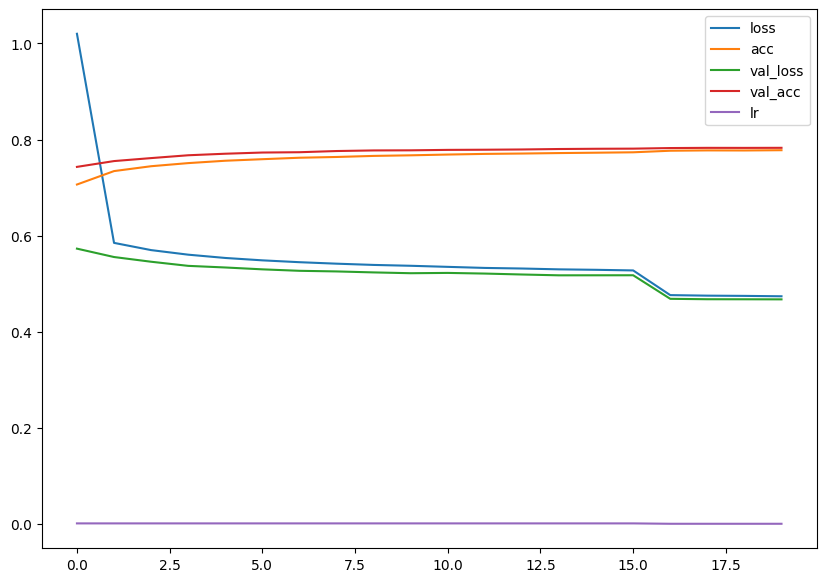

In [ ]:
# Plot the training curves
pd.DataFrame(model_10_history.history).plot(figsize=(10, 7));

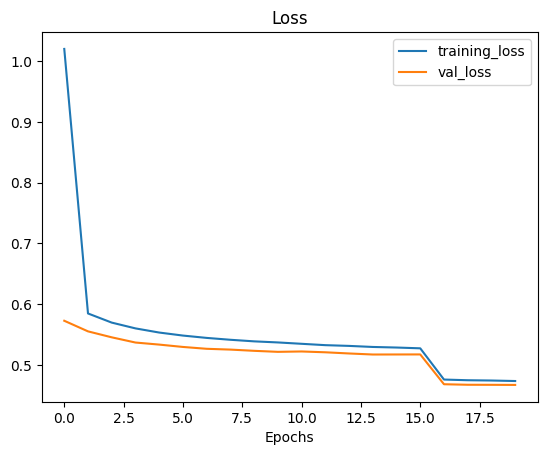

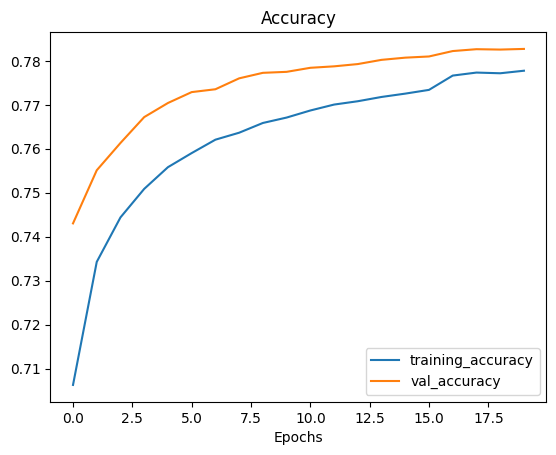

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(model_10_history)

In [ ]:
# Make predictions
preds = model_10.predict(X_test)
preds = tf.squeeze(tf.round(tf.reduce_mean(preds, axis=1)))

9997/9997 [==============================] - 48s 5ms/step


In [ ]:
preds[:5]

<tf.Tensor: shape=(5,), dtype=float16, numpy=array([0., 0., 0., 1., 0.], dtype=float16)>

In [ ]:
preds.shape

TensorShape([319898])

In [ ]:
# Get baseline results
results = calculate_results(y_true=y_test,
                            y_pred=preds)
results

{'accuracy': 78.27119894466361,
 'precision': 0.7828493735548918,
 'recall': 0.7827119894466361,
 'f1': 0.7826753514811705}

# File Download

In [ ]:
# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("tokenizer.pkl")
  # files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("model_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Syntax
# !wget -P /content/drive/My\ Drive [file URL]

!wget -P /content/drive/AI\ Drive '...'

In [ ]:
import shutil
import os

# Define the source folder (inside your Colab environment)
source_folder = '/content/model_experiments'

# Define the destination folder (inside your Google Drive)
destination_folder = '/content/gdrive/MyDrive/ML/Models'

# Remove the destination folder (if it exists)
if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

# Copy the source folder and its contents to the destination
shutil.copytree(source_folder, destination_folder)

'/content/gdrive/MyDrive/ML/Models'

# Model Saving

In [ ]:
tf.keras.saving.save_model(model_1, filepath='model_1.h5', save_format='h5')

# Model Loading

In [ ]:
# Wrong way
# model_temp = tf.saved_model.load('model_experiments/LSTM-GRU-CNN_50D_2L')

# Correct way
model_temp = tf.keras.models.load_model('model_experiments/LSTM-GRU-CNN_50D_2L')

In [ ]:
model_temp

In [ ]:
score = model_temp.evaluate(X_test, y_test, verbose=1)

9997/9997 [==============================] - 66s 6ms/step - loss: 0.4672 - acc: 0.7827


# Model Fine Tune

In [ ]:
# Fit model
model_temp_history = model_temp.fit(train_dataset,
                                    epochs=20,
                                    validation_data=valid_dataset,
                                    callbacks=[early_stopping,
                                              reduce_lr,
                                              create_model_checkpoint(model_name="model_temp"),
                                              create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                          experiment_name="model_temp")])

Saving TensorBoard log files to: tensorflow_hub/model_temp/20240102-125628
Epoch 1/20
2500/2500 [==============================] - 71s 24ms/step - loss: 0.4737 - acc: 0.7777 - val_loss: 0.4671 - val_acc: 0.7826 - lr: 2.0000e-04
Epoch 2/20
2500/2500 [==============================] - 58s 23ms/step - loss: 0.4730 - acc: 0.7780 - val_loss: 0.4665 - val_acc: 0.7828 - lr: 2.0000e-04
Epoch 3/20
2500/2500 [==============================] - 41s 16ms/step - loss: 0.4727 - acc: 0.7784 - val_loss: 0.4672 - val_acc: 0.7830 - lr: 2.0000e-04
Epoch 4/20
2497/2500 [============================>.] - ETA: 0s - loss: 0.4722 - acc: 0.7783
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
2500/2500 [==============================] - 42s 17ms/step - loss: 0.4722 - acc: 0.7783 - val_loss: 0.4668 - val_acc: 0.7829 - lr: 2.0000e-04
Epoch 5/20
2500/2500 [==============================] - 57s 23ms/step - loss: 0.4610 - acc: 0.7797 - val_loss: 0.4577 - val_acc: 0.7828 - lr: 4.0000e-05
E

KeyboardInterrupt: ignored

# Model Evaluating

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finished

In [ ]:
# View previous experiments
!tensorboard dev list

In [ ]:
# Remove previous experiments
!tensorboard dev delete --experiment_id OUbW0O3pRqqQgAphVBxi8Q